In [1]:
# Import Libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
import matplotlib
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
!pip install chart-studio
import chart_studio.plotly as py
from plotly import __version__
from IPython.display import display, HTML

In [2]:
df = pd.read_csv('Churn_Data.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.shape

(7043, 21)

In [6]:
for item in df.columns:
    print(item)
    print (df[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


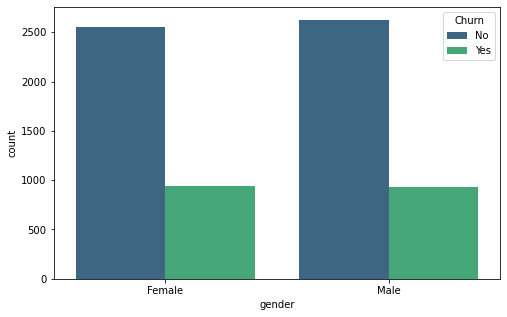

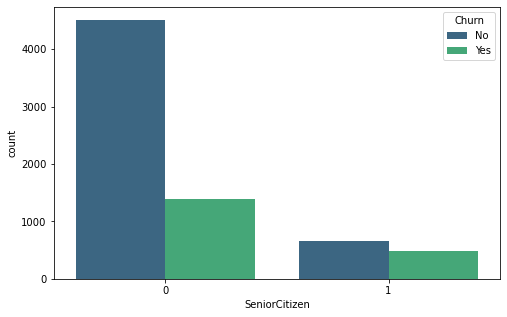

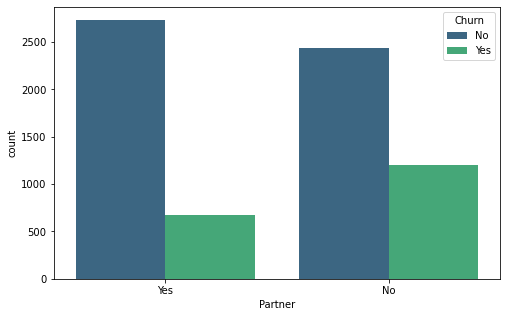

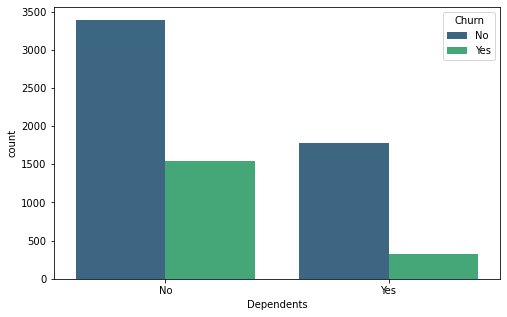

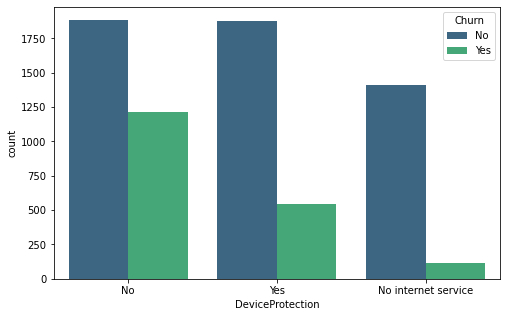

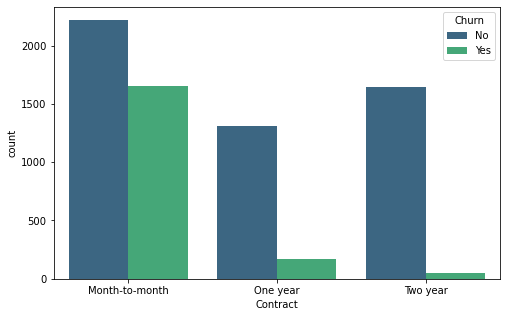

In [8]:
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'DeviceProtection', 'Contract']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=df, palette="viridis")
    plt.show()

In [9]:
dfobject=df.select_dtypes(['object'])
len(dfobject.columns)

18

In [10]:
def labelencode(columnname):
    df[columnname] = LabelEncoder().fit_transform(df[columnname])

In [11]:
for i in range(1,len(dfobject.columns)):
    labelencode(dfobject.columns[i])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
def uni(columnname):
    print(columnname,"--" ,df[columnname].unique())

In [14]:
for i in range(1,len(dfobject.columns)):
     uni(dfobject.columns[i])

gender -- [0 1]
Partner -- [1 0]
Dependents -- [0 1]
PhoneService -- [0 1]
MultipleLines -- [1 0 2]
InternetService -- [0 1 2]
OnlineSecurity -- [0 2 1]
OnlineBackup -- [2 0 1]
DeviceProtection -- [0 2 1]
TechSupport -- [0 2 1]
StreamingTV -- [0 2 1]
StreamingMovies -- [0 2 1]
Contract -- [0 1 2]
PaperlessBilling -- [1 0]
PaymentMethod -- [2 3 0 1]
TotalCharges -- [2505 1466  157 ... 2994 2660 5407]
Churn -- [0 1]


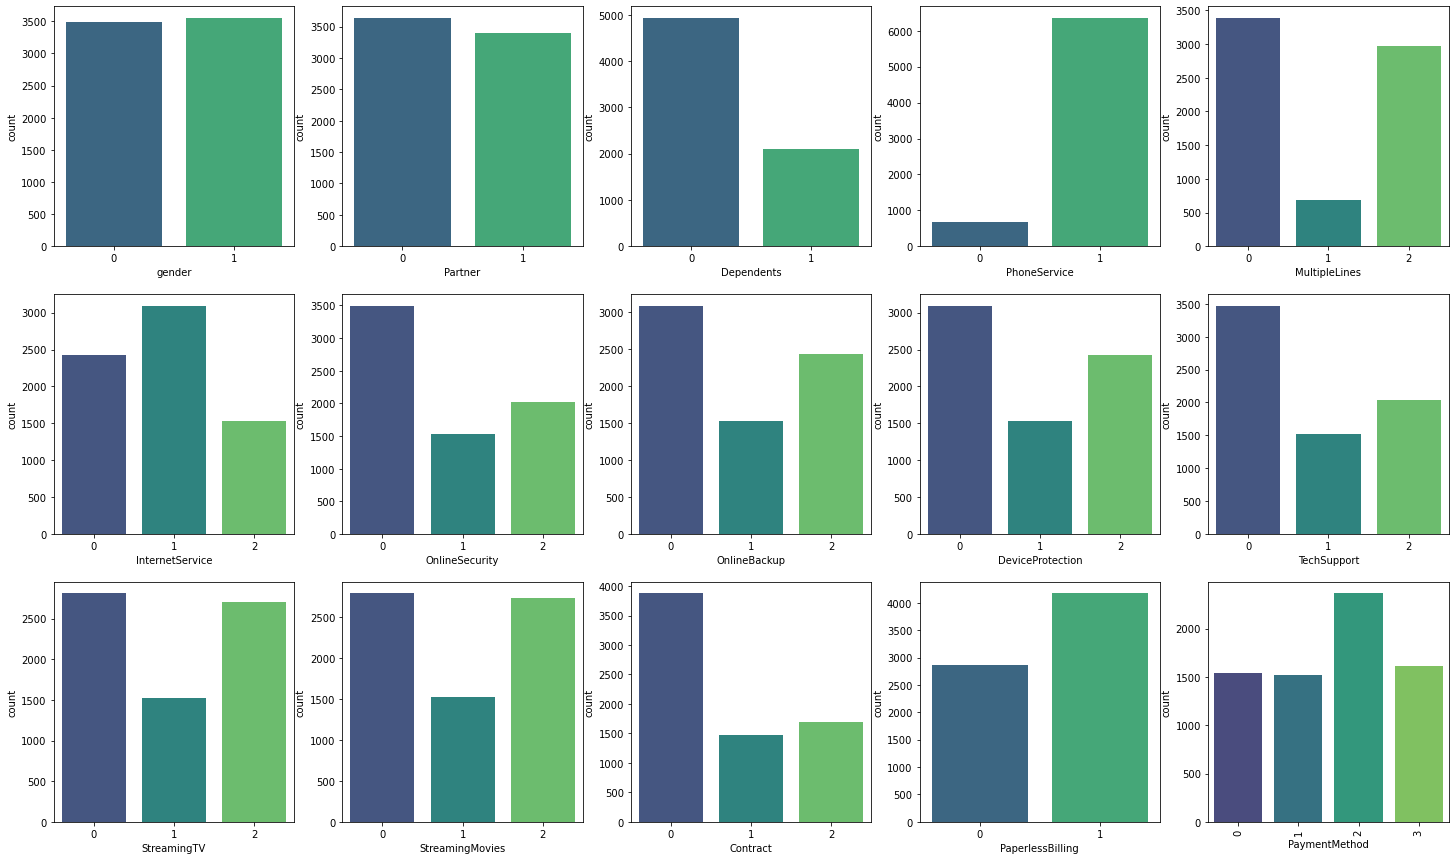

In [15]:
fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (25,15))
sns.countplot(x = "gender", data = df,palette="viridis", ax=axes[0][0])
sns.countplot(x = "Partner", data = df,palette="viridis", ax=axes[0][1])
sns.countplot(x = "Dependents", data = df,palette="viridis", ax=axes[0][2])
sns.countplot(x = "PhoneService", data = df,palette="viridis", ax=axes[0][3])
sns.countplot(x = "MultipleLines", data = df,palette="viridis", ax=axes[0][4])
sns.countplot(x = "InternetService", data = df,palette="viridis", ax=axes[1][0])
sns.countplot(x = "OnlineSecurity", data = df,palette="viridis", ax=axes[1][1])
sns.countplot(x = "OnlineBackup", data = df,palette="viridis", ax=axes[1][2])
sns.countplot(x = "DeviceProtection", data = df,palette="viridis", ax=axes[1][3])
sns.countplot(x = "TechSupport", data = df,palette="viridis", ax=axes[1][4])
sns.countplot(x = "StreamingTV", data = df,palette="viridis", ax=axes[2][0])
sns.countplot(x = "StreamingMovies", data = df,palette="viridis", ax=axes[2][1])
sns.countplot(x = "Contract", data = df,palette="viridis", ax=axes[2][2])
sns.countplot(x = "PaperlessBilling",palette="viridis", data = df, ax=axes[2][3])
ax = sns.countplot(x = "PaymentMethod", data = df,palette="viridis", ax=axes[2][4])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

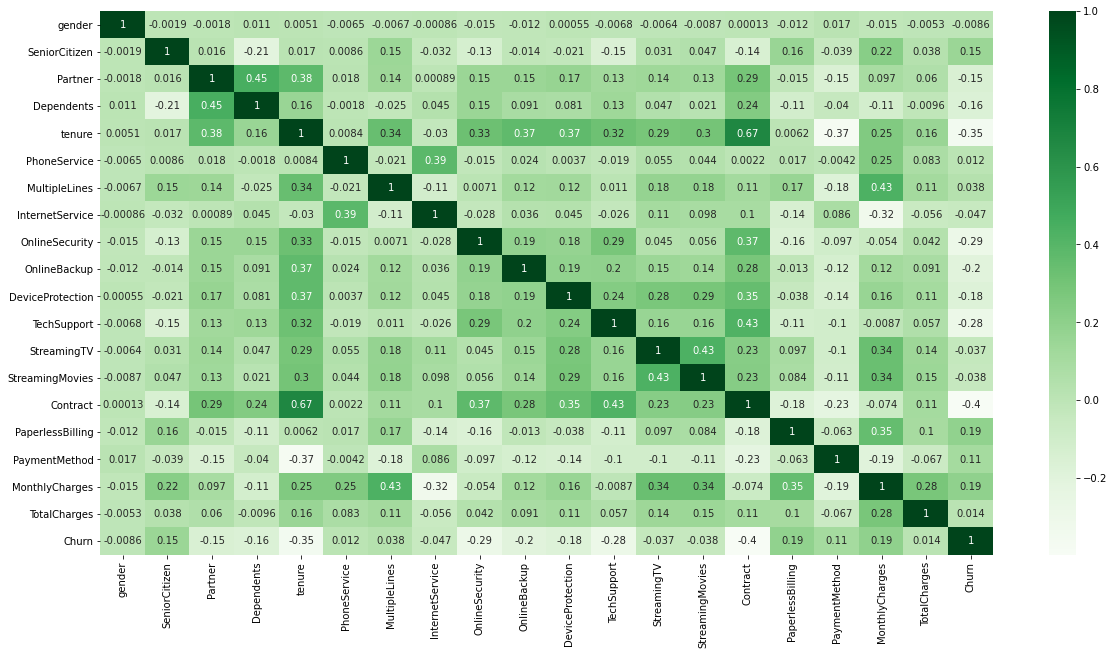

In [16]:
def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True, cmap= "Greens")
    return corr

correlation_df = show_correlations(df,show_chart=True)

Text(0.5, 1.0, 'Churn vs Non Churn')

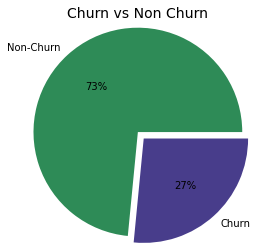

In [17]:
churn_rate = df.Churn.value_counts() / len(df.Churn)
labels = 'Non-Churn', 'Churn'

fig, ax = plt.subplots()
ax.pie(churn_rate, labels=labels,radius=1.2, colors=['seagreen','darkslateblue'], autopct='%.f%%', explode=[0,0.1])  
ax.set_title('Churn vs Non Churn', fontsize=14)

In [18]:
# Drop Customer Id for modelling
df1 = df.drop(['customerID'], axis = 1)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [20]:
X = df1.drop('Churn', 1)
y = df1['Churn']

In [21]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install --upgrade xgboost

Requirement already up-to-date: xgboost in c:\users\mumitul\anaconda3\lib\site-packages (1.3.0.post0)
Note: you may need to restart the kernel to use updated packages.


In [23]:
from xgboost import XGBClassifier

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 100)

classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['LogisticRegression :', LogisticRegression(max_iter=500)],
               ['Neural Network :', MLPClassifier()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['XGBoost :', XGBClassifier(use_label_encoder=False, disable_default_eval_metric=True)],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

DecisionTree : 0.7169900615238997
RandomForest : 0.783719829626124
Naive Bayes : 0.7340274491244676
KNeighbours : 0.7458589682915286
SVM : 0.7321344060577378
LogisticRegression : 0.7893989588263133
Neural Network : 0.7486985328916232
ExtraTreesClassifier : 0.7756743965925225
AdaBoostClassifier : 0.779460482725982
XGBoost : 0.7808802650260294
GradientBoostingClassifier:  0.7884524372929484
